In [48]:
## Libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [49]:
## Importing Datasheet
df=pd.read_csv('Insurance_Marketing-Customer-Value-Analysis (1).csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [50]:
## Creating x and y
x=df.drop(['Customer Lifetime Value'],axis=1)
y=df.iloc[:,2]
x.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/2011,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/2011,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/2011,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [51]:
for i, value in enumerate(x["Effective To Date"]):
    if(x["Effective To Date"][i][0:1]=='1'):
        p=(int(x["Effective To Date"][i][2:-5])-1)//5
    elif(x["Effective To Date"][i][0:1]=='2'):
        p=6+int(x["Effective To Date"][i][2:-5])//5
#     print(p)
    x["Effective To Date"].iat[i]=p

In [52]:
x['Effective To Date'].head()

0    10
1     6
2     9
3     3
4     6
Name: Effective To Date, dtype: object

In [53]:
## Droping unneccesary features
x=x.drop(['Gender','Location Code','Policy Type','Customer'],axis=1)

In [54]:
x.head()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Income,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,10,Employed,56274,Married,69,32,5,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,6,Unemployed,0,Single,94,13,42,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,9,Employed,48767,Married,108,18,38,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,3,Unemployed,0,Married,106,18,65,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,No,Basic,Bachelor,6,Employed,43836,Single,73,12,44,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [55]:
## Encoding the data
x = pd.get_dummies(x)

In [56]:
x.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,State_Nevada,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,56274,69,32,5,0,1,384.811147,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,94,13,42,0,8,1131.464935,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,48767,108,18,38,0,2,566.472247,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,106,18,65,0,7,529.881344,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,43836,73,12,44,0,1,138.130879,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [57]:
## Data spliting
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xTrain = sc.fit_transform(xTrain)
xTest = sc.transform (xTest)

D:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [59]:
## Applying the regressor
rf = RandomForestRegressor(n_estimators=100,min_samples_split= 7,min_samples_leaf= 7,max_features= 44,max_depth= 110,bootstrap= True, random_state=0, n_jobs=-1)
rf.fit(xTrain, yTrain)
ypred=rf.predict(xTest)

In [60]:
ypred=np.array(ypred)
yTest=np.array(yTest)

In [61]:
## For finding RMSE
sum=0
for i in range(0,len(ypred)):
    sum=sum+(ypred[i]-yTest[i])*(ypred[i]-yTest[i])

In [62]:
rsm=sum/len(ypred)

In [63]:
rsm=rsm**0.5

In [64]:
rsm

3527.032590878588

In [65]:
## for finding MAPE

from sklearn.utils.validation import check_array
def mean_absolute_percentage_error(yTest, ypred): 
    yTest, ypred = check_arrays(yTest, ypred)
    
    
return np.mean(np.abs((yTest - ypred) / yTest)) * 100

10.848563283330321

In [66]:
## the following codes are for plotting the data

ypred2=[]
for i in range(5):
    ypred2.append(ypred[i])
    
yTest2=[]
for i in range(5):
    yTest2.append(yTest[i])

In [67]:
lu=[]
for i in range(2284):
    lu.append(i)
    
    
lum2=[]
for i in range(2284):
    lum2.append(i)

In [68]:
lum2=np.arange(0,2284,10)
ypred3=[]
yTest3=[]
for i in lum2:
    ypred3.append(ypred[i])
    yTest3.append(yTest[i])
    

In [69]:
ypred4=ypred3
ypred4.sort()
yTest4=yTest3
yTest4.sort()


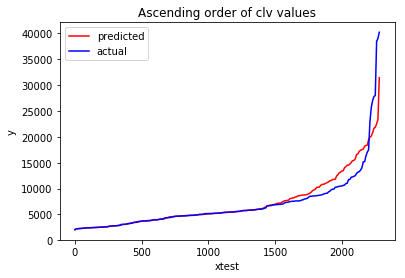

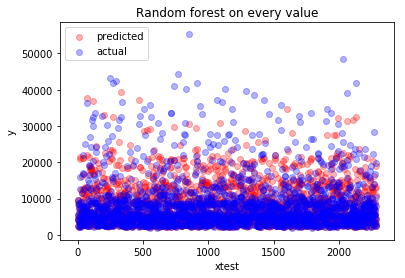

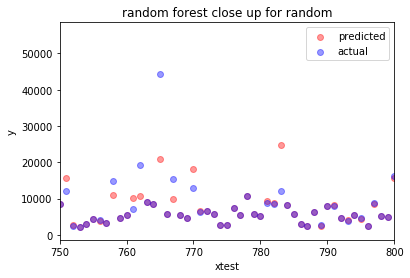

In [70]:
plt.figure(1)
#plt.scatter( lum,ypred4, color = 'red',label='predicted')
plt.plot( lum2,ypred4, color = 'red',label='predicted')
plt.title('Ascending order of clv values')
plt.xlabel('xtest')
plt.ylabel('y')
plt.legend()
#plt.scatter( lum,yTest4, color = 'blue',label='actual')
plt.plot( lum2,yTest4, color = 'blue',label='actual')
plt.xlabel('xtest')
plt.ylabel('y')
plt.legend()
plt.figure(2)
plt.scatter( lu,ypred, color = 'red',label='predicted',alpha='0.3')
#plt.plot( lum,ypred3, color = 'red',label='predicted')
plt.title('Random forest on every value')
plt.xlabel('xtest')
plt.ylabel('y')
plt.legend()
plt.scatter( lu,yTest, color = 'blue',label='actual',alpha='0.3')
#plt.plot( lum,yTest3, color = 'blue',label='actual')
plt.xlabel('xtest')
plt.ylabel('y')
plt.legend()
plt.figure(3)
plt.xlim(750,800)
#plt.ylim(4000,8000)
plt.scatter( lu,ypred, color = 'red',label='predicted',alpha='0.4')
plt.title('random forest close up for random')
plt.xlabel('xtest')
plt.ylabel('y')
plt.legend()
plt.scatter( lu,yTest, color = 'blue',label='actual',alpha='0.4')
plt.xlabel('xtest')
plt.ylabel('y')
plt.legend()
plt.show()